In [1]:
# Notes & Lecture by Akhona Njeje.
# Date ~ 30 November 2023.
# Topic : Differentiation in Python.



import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return np.sin(x)*x -1/100*x**3

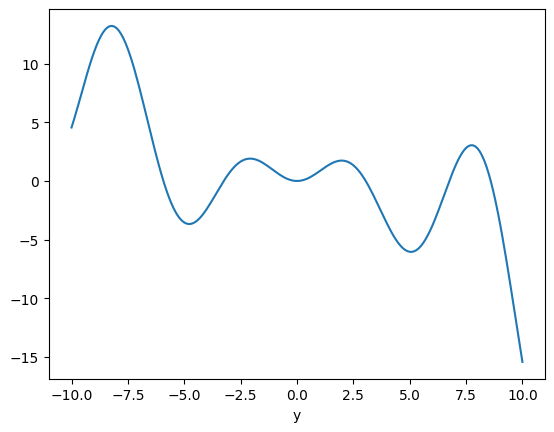

In [3]:
x_list = np.linspace(-10,10,201)
y_list = f(x_list)

plt.xlabel('x')
plt.xlabel('y')
plt.plot(x_list, y_list)

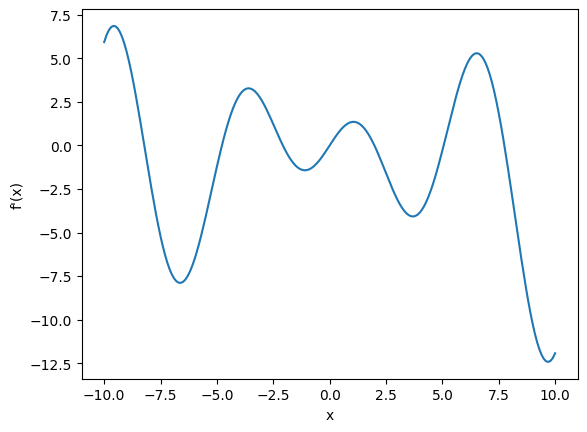

In [4]:
# Now lets compute a derivative of f(x).

x_list = np.linspace(-10, 10, 201)
analytical_d_list = np.cos(x_list)*x_list + np.sin(x_list) - 3/100*x_list**2

plt.xlabel('x')
plt.ylabel("f'(x)")
plt.plot(x_list, analytical_d_list)

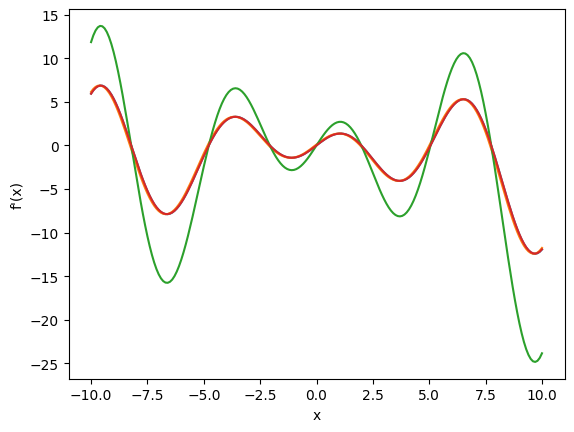

In [5]:
x_list = np.linspace(-10, 10, 201)
analytical_d_list = np.cos(x_list)*x_list + np.sin(x_list) - 3/100*x_list**2

h = 0.1
forward_d_list = ( f(x_list+h) - f(x_list)) / h
backward_d_list = ( f(x_list+h) - f(x_list - h)) / h
central_d_list = ( f(x_list+h) - f(x_list - h)) / (2*h)

plt.xlabel('x')
plt.ylabel("f'(x)")
plt.plot(x_list, analytical_d_list)
plt.plot(x_list, forward_d_list)
plt.plot(x_list, backward_d_list)
plt.plot(x_list, central_d_list)

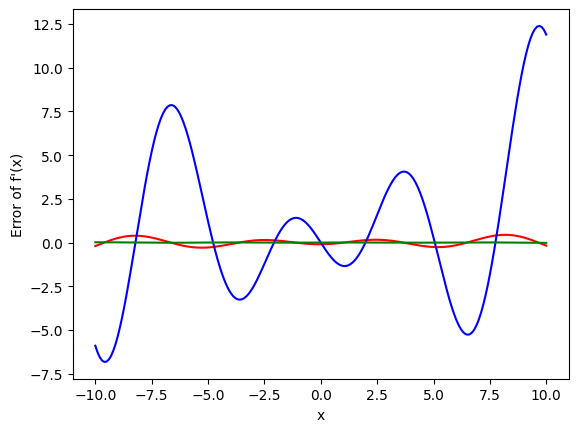

In [6]:
plt.xlabel('x')
plt.ylabel("Error of f'(x)")

plt.plot(x_list, analytical_d_list - forward_d_list, 'red')
plt.plot(x_list, analytical_d_list - backward_d_list, 'blue')
plt.plot(x_list, analytical_d_list - central_d_list, 'green')

In [7]:
# Numerical implementation of first-order derivatives.
# Taylor expansion.

# f(x+h) = ...
# f(x-h) = ...

# High accuracy with Richardson.

def D1Richardson(f, x, h):
    return 1/(12*h)*(f(x-2*h) - 8*f(x+h) - f(x-2*h))

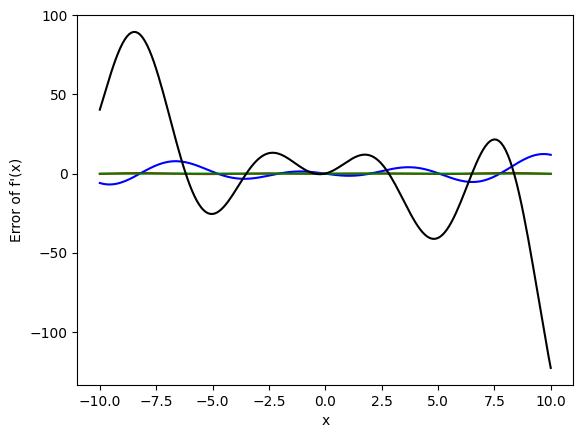

In [9]:
plt.xlabel('x')
plt.ylabel("Error of f'(x)")

richardson_d_list = D1Richardson(f, x_list, h)

plt.plot(x_list, analytical_d_list - forward_d_list, 'red')
plt.plot(x_list, analytical_d_list - backward_d_list, 'blue')
plt.plot(x_list, analytical_d_list - central_d_list, 'green')
plt.plot(x_list, analytical_d_list - richardson_d_list, 'black')

In [13]:

def D1Richardson(nmax, f, x, h):
    d0 = np.array([1/(12*h*2**j) * ( f(x-2*h*2**j) - 8*f(x - h*2**j) + 8*f(x+h*2**j) - f(x+2*h*2**j) ) for j in range(0, nmax)])
    for n in range(1,nmax):
        print(d0)
        d = np.array([(2**(2*n)*d0[j] - d0[j+1]) / (2**(2*n)-1) for j in range(0, len(d0) - 1)])
        d0 = d
    return d

In [14]:
D1Richardson(5, f, 3, h)

[-3.09884994 -3.09873722 -3.09695717 -3.06993837 -2.72051967]
[-3.09888752 -3.09933057 -3.10596344 -3.18641127]
[-3.09885798 -3.09888837 -3.10060025]
[-3.0988575 -3.0988612]


array([-3.09885748])

In [17]:
print(D1Richardson(5,f, 3, h))
print(D1Richardson(5,f, 3, 2*h))
print(D1Richardson(5,f, 3, 4*h))
print(D1Richardson(5,f, 3, 8*h))
print(D1Richardson(5,f, 3, 16*h))

[-3.09884994 -3.09873722 -3.09695717 -3.06993837 -2.72051967]
[-3.09888752 -3.09933057 -3.10596344 -3.18641127]
[-3.09885798 -3.09888837 -3.10060025]
[-3.0988575 -3.0988612]
[-3.09885748]
[-3.09873722 -3.09695717 -3.06993837 -2.72051967 -0.41429255]
[-3.09933057 -3.10596344 -3.18641127 -3.48926205]
[-3.09888837 -3.10060025 -3.16622122]
[-3.0988612  -3.09955865]
[-3.09885847]
[-3.09695717 -3.06993837 -2.72051967 -0.41429255 -0.18309293]
[-3.10596344 -3.18641127 -3.48926205 -0.49135909]
[-3.10060025 -3.16622122 -3.68912224]
[-3.09955865 -3.1579212 ]
[-3.09932978]
[-3.06993837 -2.72051967 -0.41429255 -0.18309293 -0.18315299]
[-3.18641127 -3.48926205 -0.49135909 -0.18307291]
[-3.16622122 -3.68912224 -0.51191151]
[-3.1579212  -3.73955416]
[-3.15564029]
[-2.72051967 -0.41429255 -0.18309293 -0.18315299 -0.184086  ]
[-3.48926205 -0.49135909 -0.18307291 -0.18284199]
[-3.68912224 -0.51191151 -0.18308831]
[-3.73955416 -0.51713092]
[-3.75219112]


In [18]:
3*np.cos(3) + np.sin(3) - 3/100*3**2

-3.098857481741469